# Estimando $\beta$ de los activos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/4/48/Capital_market_line_of_CAPM.svg" width="400px" height="400px" />

En la clase anterior aprendimos 
- ¿qué es el CAPM?; 
- ¿cuáles son los supuestos sobre los que se funda el CAPM?;
- derivamos la fórmula del CAPM; y
- aprendimos como obtener la $\beta$ de un portafolio a partir de la $\beta$ de activos individuales.

En la clase de hoy estudiaremos una forma de estimar los $\beta$ de activos individuales.

**Objetivos:**
- Revisitar riesgo sistemático y no sistemático.
- Estudiar un método para estimar las $\beta$ de los activos.

*Referencia:*
- Notas del curso "Portfolio Selection and Risk Management", Rice University, disponible en Coursera.
- [Notas del curso "Financial Engineering", Columbia University](http://www.columbia.edu/~ks20/FE-Notes/FE-Notes-Sigman.html)
___

## 1. Riesgo sistemático y no sistemático.

Recordamos la fórmula de CAPM:

$$E[r_i]-r_f=\beta_i(E[r_M]-r_f),$$

donde $\beta_i=\frac{\sigma_{M,i}}{\sigma_M^2}$ y $\sigma_{M,i}$ es la covarianza del portafolio de mercado con el activo individual $i$.

Todas las anteriores son variables determinísiticas.

- ¿Qué pasa si usamos el CAPM como un modelo de rendimientos? Es decir,

$$r_i=r_f+\beta_i(r_M-r_f)+\epsilon_i,$$

donde $\epsilon_i$ es un término de error.

<font color=green> Despejando $\epsilon_i$, tenemos que: </font>

- $E[\epsilon_i]=0$, y
- $cov(\epsilon_i,r_M)=0$.

<font color=green> Ver en el tablero. </font>

Entonces, la varianza del activo $i$ es:

$$\sigma_i^2=\beta_i^2\sigma_M^2+var(\epsilon_i),$$

donde el primer término corresponde al riesgo sistemático (de mercado) y el segundo al riesgo idiosincrático.
___

## 2. Estimando $\beta$ para un activo.

- En el mercado real, la cantidad de activos es ENORME, y tratar de construir el portafolio de mercado sería una tarea grandiosa, pero poco realista para un analista financiero. 
- Por lo tanto, los índices de mercado han sido creados para intentar aproximar el portafolio de mercado.
- Dicho índice es un portafolio más pequeño que el de mercado, construido por los que se consideran los activos más dominantes, y que capturan la esencia de el portafolio de mercado.

- El índice de mercado más conocido es el Standard & Poor’s 500-stock index (S&P), compuesto de 500 activos.
- Un $\beta$ para un activo dado, se puede estimar utilizando el S&P en reemplazo de M, y utilizando datos históricos para ambos rendimientos (el del activo y el del S&P500).
- Por ejemplo, considere un activo $i$ para el cual queremos estimar su $\beta_i$.
- Este estimado se construye usando medias, varianzas y covarianzas muestrales como sigue:
 - Escogemos $N$ rendimientos históricos, tales como los reportados mensualmente hace tres años.
 - Para $k=1,2,\dots,N$, $r_{ik}$ y $r_{S\&Pk}$ denotan el $k-$ésimo valor muestral de los rendimietos.

Entonces

$$\hat{E[r_i]}=\frac{1}{N}\sum_{k=1}^{N}r_{ik}, \text{ y}$$

$$\hat{E[r_{S\&P}]}=\frac{1}{N}\sum_{k=1}^{N}r_{S\&Pk}.$$

Además, la varianza $\sigma_{S\&P}^2$ se estima como

$$\hat{\sigma_{S\&P}^2}=\frac{1}{N-1}\sum_{k=1}^{N}(r_{S\&Pk}-\hat{E[r_{S\&P}]})^2,$$

y la covarianza $\sigma_{S\&P,i}$

$$\hat{\sigma_{S\&P,i}}=\frac{1}{N-1}\sum_{k=1}^{N}(r_{S\&Pk}-\hat{E[r_{S\&P}]})(r_{ik}-\hat{E[r_i]})$$

Finalmente, 

$$\hat{\beta_i}=\frac{\hat{\sigma_{S\&P,i}}}{\hat{\sigma_{S\&P}^2}}.$$

### Ejemplo...

Entrar a yahoo finance, a la información de MSFT, AAPL y ^GSPC.

In [1]:
# Importar paquetes
import pandas as pd
import pandas_datareader.data as web

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None, freq='m'):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.YahooDailyReader(symbols=tickers, start=start_date, end=end_date, interval=freq).read()['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [13]:
# Importar datos de AAPL, MSFT, y ^GSPC
closes = get_adj_closes(tickers=['AAPL', 'MSFT', '^GSPC'],
                        start_date='2015-10-30')

In [14]:
closes

Symbols,AAPL,MSFT,^GSPC
Date,,,
2015-11-01,27.330675,49.393021,2080.409912
2015-12-01,24.422157,50.759815,2043.939941
2016-01-01,22.584578,50.402992,1940.239990
2016-02-01,22.433773,46.551182,1932.229980
2016-03-01,25.424799,50.893883,2059.739990
...,...,...,...
2020-08-01,128.807755,224.986130,3500.310059
2020-09-01,115.809998,210.330002,3363.000000
2020-10-01,108.860001,202.470001,3269.959961


In [26]:
# Obtener rendimientos mensuales
ret = closes.pct_change().dropna()

In [27]:
ret

Symbols,AAPL,MSFT,^GSPC
Date,,,
2015-12-01,-0.106420,0.027672,-0.017530
2016-01-01,-0.075242,-0.007030,-0.050735
2016-02-01,-0.006677,-0.076420,-0.004128
2016-03-01,0.133327,0.093289,0.065991
2016-04-01,-0.139921,-0.097049,0.002699
...,...,...,...
2020-08-01,0.214380,0.100093,0.070065
2020-09-01,-0.100908,-0.065142,-0.039228
2020-10-01,-0.060012,-0.037370,-0.027666


In [28]:
# Obtener matriz de covarianza
cov = ret.cov()
cov

Symbols,AAPL,MSFT,^GSPC
Symbols,,,
AAPL,0.007619,0.003042,0.002423
MSFT,0.003042,0.002822,0.001599
^GSPC,0.002423,0.001599,0.001821


In [29]:
# Beta de Microsoft
beta_MSFT = cov.loc['MSFT', '^GSPC']/cov.loc['^GSPC', '^GSPC']
round(beta_MSFT, 2)

0.88

In [30]:
# Beta de Apple
beta_AAPL = cov.loc['AAPL', '^GSPC']/cov.loc['^GSPC', '^GSPC']
round(beta_AAPL, 2)

1.33

## 3. Ejercicios

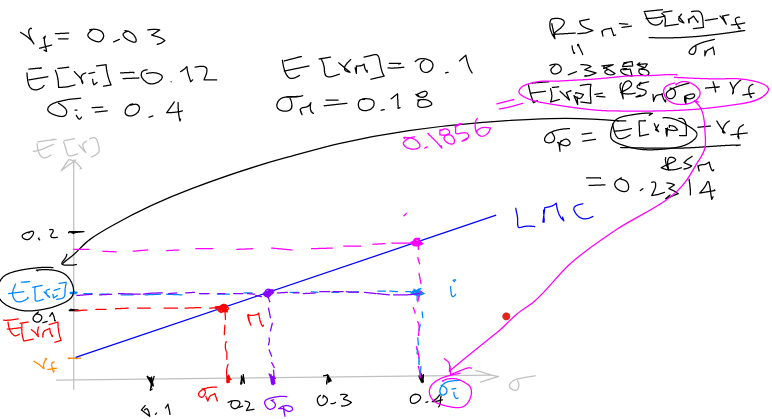

In [34]:
from IPython.display import Image
Image("Ejercicio1y2clase16PF.png")

Su portafolio de inversión consiste de $\$150,000$ invertidos en un solo activo. Suponga que la tasa de interés libre de riesgo es $3\%$. Este activo tiene un rendimiento esperado del $12\%$, y una volatilidad del $40\%$, y el portafolio de mercado tiene un rendimiento esperado del $10\%$ y una volatilidad del $18\%$. Bajo las suposiciones del CAPM, ¿cuál es la volatilidad de un mejor portafolio alternativo que tiene el mismo rendimiento que el activo?

A. $\sigma = 15.52\%$

B. $\sigma = 23.14\%$

C. $\sigma = 30.25\%$ 

D. $\sigma = 35.13\%$ 

In [31]:
rf = .03
Eri = 0.12
si = 0.4
Erm = 0.1
sm = 0.18
RSm = (Erm-rf)/sm
sp = (Eri-rf)/RSm
sp

0.23142857142857137

Respuesta b: 23.14%

Con los mismos datos del ejercicio anterior, y suponiendo que usted está conforme con el riesgo del activo, bajo las suposiciones de CAPM, ¿cuál sería un mejor rendimiento esperado que debería ganar?

A. $E[r] = 13.65\%$

B. $E[r] = 15.30\%$

C. $E[r] = 18.56\%$

D. $E[r] = 20.38\%$ 

In [33]:
Erp = RSm*si+rf
Erp

0.18555555555555558

Respuesta c: 18.56%

Suponga que usted tiene invertidos $\$30,000$ en los siguientes cuatro activos:

| Activo        | Cantidad invertida | $\beta$ |
| ------------- | ------------------ | ------- |
| Activo A      | $\$5,000$          | 0.75    |
| Activo B      | $\$10,000$         | 1.10    |
| Activo C      | $\$8,000$          | 1.36    |
| Activo D      | $\$7,000$          | 1.88    |

La tasa libre de riesgo es del $2\%$ y el rendimiento esperado del portafolio de mercado es del $8\%$. Con base en el CAPM, ¿cuál es la $\beta$ del portafolio?

A. $\beta_P = 0.95$

B. $\beta_P = 1.19$

C. $\beta_P = 1.29$

D. $\beta_P = 1.62$

In [35]:
Cap = 30000
A = 5000
B = 10000
C = 8000
D = 7000
Bp = A/Cap * .75 +B/Cap * 1.10 +C/Cap * 1.36 + D/Cap * 1.88
Bp

1.2930000000000001

La respuesta es C: 1.29

Considere la siguiente distribución de rendimientos:

| Estado de la economía | Probabilidad       | $R_A$   |
| --------------------- | ------------------ | ------- |
| Depresión             | 0.30               | 0.10    |
| Normal                | 0.50               | 0.15    |
| Expansión             | 0.20               | 0.25    |

Suponiendo que el CAPM es válido, que la volatilidad del portafolio de mercado es $\sigma_M=0.10$ y que la correlación del activo A y el portafolio de mercado es $\rho_{A,M}=0.9$, ¿cuál es el valor de $\beta_A$?

A. $\beta_A=0.25$

B. $\beta_A=0.47$

C. $\beta_A=0.55$

D. $\beta_A=1.15$

In [46]:
import numpy as np
sm = .1
ro_am = .9
ErA = .3*.1 + .5*.15 + .2*.25
sA = np.sqrt((0.3*(0.1-ErA)**2)+(0.5*(0.15-ErA)**2)+(0.2*(0.25-ErA)**2))
sA,ErA
BetaA = ro_am*sA/sm
BetaA

0.46981379290097475

Respuesta B

Un fondo de inversiones con $\beta=0.8$ tiene un rendimiento esperado del $16\%$. Si la tasa libre de riesgo es $4\%$ y el rendimiento esperado del portafolio de mercado es del $13\%$, ¿debería invertir en este fondo?

A. Si.

B. No.

In [47]:
Betap = 0.8
Erp = 0.16
Erm = 0.13
rf = 0.04
Erpcapm = rf + Betap*(Erm-rf)
Erpcapm

0.11199999999999999

Respuesta A: Sí deberíamos invertir, ya que nos ofrecen un rendimiento mayor al esperado en el CAPM

Suponga que encontramos un activo el cual, con base en su precio al día de hoy, tiene un rendimiento esperado más bajo que lo que sugiere la línea de mercado de activos. Si el CAPM es válido, ¿cuál(es) de las siguientes proposiciones es (son) verdaderas?

A. Si el activo tiene un rendimiento esperado más bajo que el sugerido por la línea, significa que su precio es muy bajo.

B. Si el activo tiene un rendimiento esperado más bajo que el sugerido por la línea, significa que su precio es muy alto.

C. El activo se grafica por encima de la línea.

D. El activo se grafica bajo la línea.

Respuesta B y D, el precio es muy alto y el activo se grafica bajo la línea

# Anuncios parroquiales

## 1. Último quiz el martes 10 de Noviembre.
## 2. Revisar archivo Tarea7: para el martes 3 de Noviembre.
## 3. Martes 3 de Noviembre y Viernes 6 de Noviembre no hay clase.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>